In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv("../csv/Johannesburg.csv")

## Data exploration

In [154]:
data.shape

(10243, 11)

In [155]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             10243 non-null  object 
 1   bedrooms          8549 non-null   float64
 2   bathrooms         8610 non-null   float64
 3   Type of Property  10030 non-null  object 
 4   Erf Size          5722 non-null   object 
 5   Floor Size        5113 non-null   object 
 6   Levies            3430 non-null   object 
 7   Pool              10243 non-null  int64  
 8   Rates and Taxes   5284 non-null   object 
 9   parking space     6967 non-null   float64
 10  Pets Allowed      4483 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 880.4+ KB


None

In [156]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
bedrooms,8549.0,3.149433,3.968352,0.5,2.0,3.0,3.0,152.0
bathrooms,8610.0,2.164518,2.280858,0.5,1.0,2.0,2.5,80.0
Pool,10243.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
parking space,6967.0,2.681427,2.973883,1.0,1.0,2.0,3.0,122.0
Pets Allowed,4483.0,0.548294,0.497718,0.0,0.0,1.0,1.0,1.0


In [157]:
display(data.sample(10).T)

,4447,4589,8678,2109,4960,6188,2433,7224,4930,4049
price,R 226 000,R 545 000,R 6 400 000,R 1 395 000,R 1 650 000,R 2 200 000,R 181 000,R 3 999 000,R 1 900 000,R 1 350 000
bedrooms,0.5,2.0,NaN,2.0,2.0,NaN,NaN,3.0,NaN,NaN
bathrooms,1.0,1.0,NaN,2.0,2.0,NaN,1.0,2.0,NaN,NaN
Type of Property,Apartment/Flat,Townhouse,CommercialProperty,Apartment/Flat,Apartment/Flat,VacantLand/Plot,Apartment/Flat,House,Townhouse,CommercialProperty
Erf Size,NaN,4510ha,3375m²,NaN,NaN,1050m²,1487m²,1487m²,208m²,NaN
Floor Size,42m²,64m²,NaN,NaN,82m²,NaN,42m²,NaN,NaN,NaN
Levies,R650,R900,NaN,R1932,R2500,R2750,NaN,NaN,R2075,NaN
Pool,0,0,0,0,0,0,0,0,0,0
Rates and Taxes,R220,R360,NaN,R605,R1300,NaN,NaN,NaN,NaN,NaN
parking space,1.0,NaN,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN


In [158]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'type_of_property', 'erf_size',
       'floor_size', 'levies', 'pool', 'rates_and_taxes', 'parking_space',
       'pets_allowed'],
      dtype='object')

<AxesSubplot:>

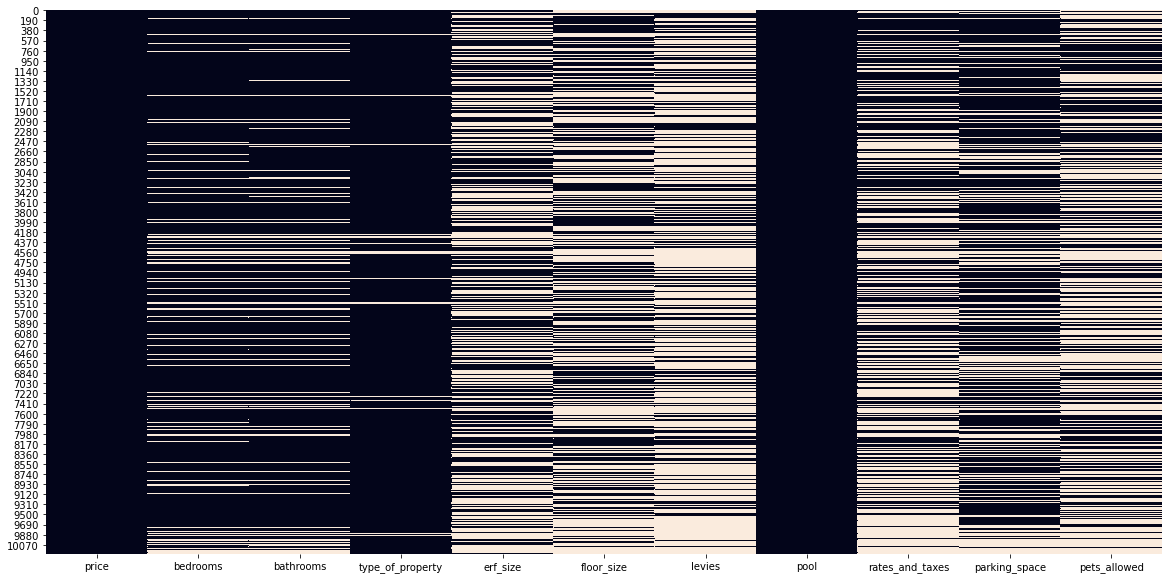

In [159]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

### Data cleaning

Transform values erf_size, floor_size, price, levies, rate_and_taxes

In [160]:
data['erf_size'] = data['erf_size'].str.replace('m²', '')
data['erf_size'] = data['erf_size'].str.replace(' ', '')
data['erf_size'].loc[data['erf_size'].str.contains('ha', na=False)]
# convert ha into m²
data['erf_size'] = data['erf_size'].str.replace('ha', '0000')
data['erf_size'] = pd.to_numeric(data['erf_size'], errors='coerce')

data['floor_size'] = data['floor_size'].str.replace('m²', '')
data['floor_size'] = data['floor_size'].str.replace(' ', '')
data['floor_size'] = pd.to_numeric(data['floor_size'], errors='coerce')

data['price'] = data['price'].str.replace('R', '')
data['price'] = data['price'].str.replace(' ', '')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

data['levies'] = data['levies'].str.replace(' ', '')
data['levies'] = data['levies'].str.replace('R', '')
data['levies'] = pd.to_numeric(data['levies'], errors='coerce')

data['rates_and_taxes'] = data['rates_and_taxes'].str.replace('R', '')
data['rates_and_taxes'] = data['rates_and_taxes'].str.replace(' ', '')
data['rates_and_taxes'] = pd.to_numeric(data['rates_and_taxes'], errors='coerce')

In [161]:
display(data.sample(10))

,price,bedrooms,bathrooms,type_of_property,erf_size,floor_size,levies,pool,rates_and_taxes,parking_space,pets_allowed
7299,5400000.0,3.0,3.5,Townhouse,410.0,300.0,2000.0,0,1800.0,2.5,1.0
7771,1800000.0,2.0,1.0,Apartment/Flat,NaN,113.0,3760.0,0,NaN,1.0,0.0
3456,5525000.0,NaN,NaN,IndustrialProperty,650.0,650.0,NaN,0,NaN,NaN,NaN
5347,595000.0,2.0,1.0,Apartment/Flat,35290.0,79.0,1600.0,0,350.0,NaN,0.0
4932,1420000.0,3.0,2.0,House,495.0,NaN,NaN,0,NaN,2.0,NaN
9096,3999999.0,4.0,3.0,House,NaN,1069.0,NaN,0,3620.0,2.0,1.0
6667,4200000.0,6.0,3.0,House,2000.0,NaN,400.0,0,600.0,2.0,NaN
3921,665000.0,2.0,1.0,Apartment/Flat,NaN,51.0,750.0,0,500.0,2.0,0.0
10146,350000.0,1.0,1.0,House,200.0,NaN,NaN,0,NaN,NaN,NaN
3372,8455000.0,NaN,NaN,IndustrialProperty,950.0,950.0,NaN,0,NaN,NaN,NaN


In [162]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9963 non-null   float64
 1   bedrooms          8549 non-null   float64
 2   bathrooms         8610 non-null   float64
 3   type_of_property  10030 non-null  object 
 4   erf_size          5720 non-null   float64
 5   floor_size        5113 non-null   float64
 6   levies            3430 non-null   float64
 7   pool              10243 non-null  int64  
 8   rates_and_taxes   5284 non-null   float64
 9   parking_space     6967 non-null   float64
 10  pets_allowed      4483 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 880.4+ KB


None

In [163]:
display(data.describe())

,price,bedrooms,bathrooms,erf_size,floor_size,levies,pool,rates_and_taxes,parking_space,pets_allowed
count,9.963000e+03,8549.000000,8610.000000,5.720000e+03,5113.000000,3.430000e+03,10243.0,5.284000e+03,6967.000000,4483.000000
mean,2.934576e+06,3.149433,2.164518,6.321961e+05,441.498142,5.891972e+03,0.0,2.140662e+03,2.681427,0.548294
std,6.616672e+06,3.968352,2.280858,1.464840e+07,2176.412499,1.711409e+05,0.0,3.678641e+04,2.973883,0.497718
min,8.000000e+03,0.500000,0.500000,1.000000e+00,1.000000,0.000000e+00,0.0,0.000000e+00,1.000000,0.000000
25%,7.550000e+05,2.000000,1.000000,4.950000e+02,63.000000,1.137250e+03,0.0,4.000000e+02,1.000000,0.000000
50%,1.399000e+06,3.000000,2.000000,8.640000e+02,102.000000,1.650000e+03,0.0,7.090000e+02,2.000000,1.000000
75%,2.800000e+06,3.000000,2.500000,1.616000e+03,247.000000,2.500000e+03,0.0,1.500000e+03,3.000000,1.000000
max,2.685000e+08,152.000000,80.000000,6.100000e+08,65534.000000,9.500000e+06,0.0,2.300000e+06,122.000000,1.000000


### Visualisation des correlations

#### Correlation entre features et le label

<AxesSubplot:>

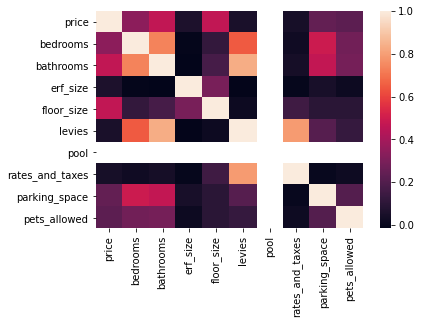

In [164]:
sns.heatmap(data.corr())

In [165]:
data.corr()['price'].sort_values(ascending=False)

price              1.000000
floor_size         0.466185
bathrooms          0.464472
bedrooms           0.343688
parking_space      0.244216
pets_allowed       0.225884
erf_size           0.060782
levies             0.052965
rates_and_taxes    0.045452
pool                    NaN
Name: price, dtype: float64

#### Correlation entre les features

In [166]:
data.corr()['bathrooms'].sort_values(ascending=False)

bathrooms          1.000000
levies             0.833410
bedrooms           0.734139
parking_space      0.471055
price              0.464472
pets_allowed       0.288481
floor_size         0.170636
rates_and_taxes    0.039167
erf_size          -0.016780
pool                    NaN
Name: bathrooms, dtype: float64

In [167]:
data.corr()['levies'].sort_values(ascending=False)

levies             1.000000
bathrooms          0.833410
rates_and_taxes    0.791657
bedrooms           0.648739
parking_space      0.212698
pets_allowed       0.126781
price              0.052965
floor_size         0.018191
erf_size          -0.011273
pool                    NaN
Name: levies, dtype: float64

In [168]:
data.corr()['rates_and_taxes'].sort_values(ascending=False)

rates_and_taxes    1.000000
levies             0.791657
floor_size         0.152614
price              0.045452
bathrooms          0.039167
bedrooms           0.025549
pets_allowed       0.020368
parking_space      0.007024
erf_size          -0.001180
pool                    NaN
Name: rates_and_taxes, dtype: float64

### Visualisation des outliers

<AxesSubplot:xlabel='price'>

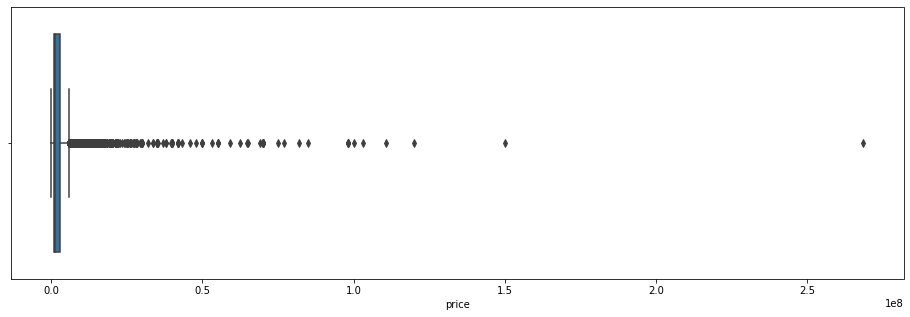

In [169]:
plt.figure(figsize=(16,5))
sns.boxplot(x=data['price'])

In [170]:
data['levies'].isna().value_counts()/data.shape[0]

True     0.665137
False    0.334863
Name: levies, dtype: float64

## Préprocessing

<AxesSubplot:ylabel='type_of_property'>

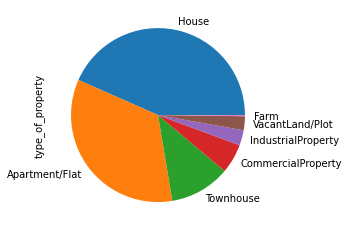

In [171]:
data['type_of_property'].value_counts().plot.pie()

In [172]:
data = data.drop(data.loc[data['type_of_property'] == 'CommercialProperty'].index)
data = data.drop(data.loc[data['type_of_property'] == 'Farm'].index)
data = data.drop(data.loc[data['type_of_property'] == 'VacantLand/Plot'].index)
data = data.drop(data.loc[data['type_of_property'] == 'IndustrialProperty'].index)

<AxesSubplot:ylabel='type_of_property'>

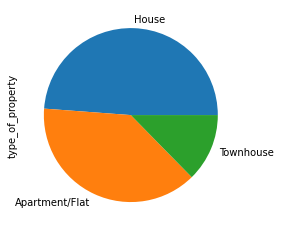

In [173]:
data['type_of_property'].value_counts().plot.pie()

In [174]:
data.shape

(9128, 11)

In [175]:
price_house = data.loc[data['type_of_property'] == 'House']

In [176]:
price_house

,price,bedrooms,bathrooms,type_of_property,erf_size,floor_size,levies,pool,rates_and_taxes,parking_space,pets_allowed
2,3995000.0,9.0,9.0,House,1575.0,1060.0,NaN,0,2500.0,17.0,1.0
3,4950000.0,4.0,3.0,House,679.0,329.0,NaN,0,3056.0,6.0,1.0
4,2095000.0,4.0,2.0,House,990.0,452.0,NaN,0,800.0,4.0,1.0
6,1785000.0,3.0,2.0,House,NaN,NaN,850.0,0,1000.0,2.0,NaN
9,1495000.0,4.0,2.0,House,NaN,NaN,NaN,0,520.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10225,1700000.0,9.0,6.0,House,NaN,NaN,NaN,0,NaN,3.0,NaN
10229,735000.0,NaN,NaN,House,NaN,NaN,NaN,0,NaN,NaN,NaN
10232,450000.0,2.0,1.0,House,135.0,NaN,NaN,0,270.0,NaN,NaN
10237,1350000.0,4.0,2.0,House,1900.0,NaN,NaN,0,NaN,4.0,1.0


Supprimer la colonne 'levies' car il y a beaucoup de NaN et que la correlation entre les autres features et 'levies' est assez considerable

    * 63% NaN
    * 37% Number

In [177]:
data.drop('levies', axis=1)

,price,bedrooms,bathrooms,type_of_property,erf_size,floor_size,pool,rates_and_taxes,parking_space,pets_allowed
0,3364900.0,2.0,2.0,Apartment/Flat,83.0,83.0,0,NaN,NaN,NaN
1,755000.0,2.0,1.0,Apartment/Flat,NaN,NaN,0,680.0,NaN,NaN
2,3995000.0,9.0,9.0,House,1575.0,1060.0,0,2500.0,17.0,1.0
3,4950000.0,4.0,3.0,House,679.0,329.0,0,3056.0,6.0,1.0
4,2095000.0,4.0,2.0,House,990.0,452.0,0,800.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10233,799000.0,1.0,1.0,Apartment/Flat,NaN,54.0,0,881.0,NaN,NaN
10235,550000.0,2.0,NaN,Apartment/Flat,NaN,NaN,0,250.0,1.0,NaN
10236,890000.0,1.0,1.0,Apartment/Flat,NaN,NaN,0,NaN,NaN,0.0
10237,1350000.0,4.0,2.0,House,1900.0,NaN,0,NaN,4.0,1.0


In [178]:
data['type_of_property'].isna().value_counts()/data.shape[0]

False    0.976665
True     0.023335
Name: type_of_property, dtype: float64

In [179]:
# outliers =  data[(data['price'] <= data['price'].quantile(0.99)) & (data['price'] >= data['price'].quantile(0.01))]
upper_price_limit = data['price'].quantile(0.99999999)
lower_price_limit = data['price'].quantile(0.01)

# removing outlier
data = data[(data['price'] <= upper_price_limit) & (data['price'] >= lower_price_limit)]

In [180]:
data

,price,bedrooms,bathrooms,type_of_property,erf_size,floor_size,levies,pool,rates_and_taxes,parking_space,pets_allowed
0,3364900.0,2.0,2.0,Apartment/Flat,83.0,83.0,2000.0,0,NaN,NaN,NaN
1,755000.0,2.0,1.0,Apartment/Flat,NaN,NaN,600.0,0,680.0,NaN,NaN
2,3995000.0,9.0,9.0,House,1575.0,1060.0,NaN,0,2500.0,17.0,1.0
3,4950000.0,4.0,3.0,House,679.0,329.0,NaN,0,3056.0,6.0,1.0
4,2095000.0,4.0,2.0,House,990.0,452.0,NaN,0,800.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10233,799000.0,1.0,1.0,Apartment/Flat,NaN,54.0,265.0,0,881.0,NaN,NaN
10235,550000.0,2.0,NaN,Apartment/Flat,NaN,NaN,500.0,0,250.0,1.0,NaN
10236,890000.0,1.0,1.0,Apartment/Flat,NaN,NaN,NaN,0,NaN,NaN,0.0
10237,1350000.0,4.0,2.0,House,1900.0,NaN,NaN,0,NaN,4.0,1.0
